# Exploring Spain's Broken Labor Market

**Author** Bosco Rodríguez Ballvé
**Date** Fall 2016
**Class** Data Bootcamp @ NYU Stern 
**Instructors** Coleman, Lyon



## Abstract

A successful economy in the 21st century, in which the mix of products and services is changing constantly, requires a dynamic labor market as a mechanism to shift capital and labor. The ability of an economy to reallocate jobs across firms, industries, and geographical areas is, perhaps, even more important than capital. 

Decades of persistently high unemployment in Spain, regardless of business cycle fluctuations, suggest that lack labor market dynamism has hindered Spain’s economy. Currently, almost a decade after the Great Recession, with economic recovery underway, Spain’s unemployment rate remains stubbornly high. Particularly amongst the youth. Chronic unemployment suggests deep rooted, structural causes that go beyond demand-deficient or cyclical unemployment. 

The aim of this project is to compile and process data to shed ight on the relationship between education levels, age and structural unemployment in Spain.

## Loading the modules

In [3]:
import pandas as pd
from pandas_datareader import data, wb # we will be working with World Bank Data 
import wbdata
import pandas
import matplotlib.pyplot as plt
import sys                             
import matplotlib as mpl            
import matplotlib.pyplot as plt      
import datetime as dt                  
%matplotlib inline  

## Data extraction and clean up

My first data source is the World Bank. We will access World Bank data by using 'Wbdata', Wbdata is a simple python interface to find and request information from the World Bank's various databases, either as a dictionary containing full metadata or as a pandas DataFrame. Currently, wbdata wraps most of the World Bank API, and also adds some convenience functions for searching and retrieving information.

Documentation is available at http://wbdata.readthedocs.org/ 

We install it with 'pip install wbdata'

Credits go to:

Sherouse, Oliver (2014). Wbdata. Arlington, VA. Available from http://github.com/OliverSherouse/wbdata.

Let's get to it.

In [4]:
wb.search('gdp.*capita.*const') # we use this function to search for GDP related indicators

,id,name,source,sourceNote,sourceOrganization,topics
685,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
7437,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
7439,NY.GDP.PCAP.KN,GDP per capita (constant LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
7441,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth


In [5]:
wb.search('employment') # we use this function to search for employment related indicators

,id,name,source,sourceNote,sourceOrganization,topics
9238,SL.AGR.0714.FE.ZS,"Child employment in agriculture, female (% of ...",World Development Indicators,Employment by economic activity refers to the ...,"b""Understanding Children's Work project based ...",Social Protection & Labor ; Gender
9239,SL.AGR.0714.MA.ZS,"Child employment in agriculture, male (% of ma...",World Development Indicators,Employment by economic activity refers to the ...,"b""Understanding Children's Work project based ...",Social Protection & Labor ; Gender
9240,SL.AGR.0714.ZS,Child employment in agriculture (% of economic...,World Development Indicators,Employment by economic activity refers to the ...,"b""Understanding Children's Work project based ...",Social Protection & Labor
9241,SL.AGR.EMPL.FE.ZS,"Employment in agriculture, female (% of female...",World Development Indicators,Employment is defined as persons of working ag...,"b'International Labour Organization, Key Indic...",Agriculture & Rural Development ; Social Pro...
9242,SL.AGR.EMPL.MA.ZS,"Employment in agriculture, male (% of male emp...",World Development Indicators,Employment is defined as persons of working ag...,"b'International Labour Organization, Key Indic...",Agriculture & Rural Development ; Social Pro...
9243,SL.AGR.EMPL.ZS,Employment in agriculture (% of total employment),World Development Indicators,Employment is defined as persons of working ag...,"b'International Labour Organization, Key Indic...",Agriculture & Rural Development ; Social Pro...
9244,SL.EMP.1524.SP.FE.NE.ZS,"Employment to population ratio, ages 15-24, fe...",World Development Indicators,Employment to population ratio is the proporti...,"b'International Labour Organization, Key Indic...",Social Protection & Labor
9245,SL.EMP.1524.SP.FE.ZS,"Employment to population ratio, ages 15-24, fe...",World Development Indicators,Employment to population ratio is the proporti...,"b'International Labour Organization, Key Indic...",Social Protection & Labor ; Gender
9246,SL.EMP.1524.SP.MA.NE.ZS,"Employment to population ratio, ages 15-24, ma...",World Development Indicators,Employment to population ratio is the proporti...,"b'International Labour Organization, Key Indic...",Social Protection & Labor
9247,SL.EMP.1524.SP.MA.ZS,"Employment to population ratio, ages 15-24, ma...",World Development Indicators,Employment to population ratio is the proporti...,"b'International Labour Organization, Key Indic...",Social Protection & Labor ; Gender


In [6]:
wb.search('unemployment') # we use this function to search for unemployment related indicators

,id,name,source,sourceNote,sourceOrganization,topics
9392,SL.UEM.1524.FE.NE.ZS,"Unemployment, youth female (% of female labor ...",World Development Indicators,Youth unemployment refers to the share of the ...,"b'International Labour Organization, Key Indic...",Social Protection & Labor
9393,SL.UEM.1524.FE.ZS,"Unemployment, youth female (% of female labor ...",World Development Indicators,Youth unemployment refers to the share of the ...,"b'International Labour Organization, Key Indic...",Social Protection & Labor ; Gender
9394,SL.UEM.1524.FM.NE.ZS,Ratio of female to male youth unemployment rat...,Gender Statistics,Ratio of female to male youth unemployment is ...,"b'International Labour Organization, Key Indic...",Gender
9395,SL.UEM.1524.FM.ZS,Ratio of female to male youth unemployment rat...,Gender Statistics,Ratio of female to male youth unemployment is ...,"b'International Labour Organization, Key Indic...",Gender
9396,SL.UEM.1524.MA.NE.ZS,"Unemployment, youth male (% of male labor forc...",World Development Indicators,Youth unemployment refers to the share of the ...,"b'International Labour Organization, Key Indic...",Social Protection & Labor
9397,SL.UEM.1524.MA.ZS,"Unemployment, youth male (% of male labor forc...",World Development Indicators,Youth unemployment refers to the share of the ...,"b'International Labour Organization, Key Indic...",Social Protection & Labor ; Gender
9398,SL.UEM.1524.NE.ZS,"Unemployment, youth total (% of total labor fo...",World Development Indicators,Youth unemployment refers to the share of the ...,"b'International Labour Organization, Key Indic...",Social Protection & Labor
9399,SL.UEM.1524.ZS,"Unemployment, youth total (% of total labor fo...",World Development Indicators,Youth unemployment refers to the share of the ...,"b'International Labour Organization, Key Indic...",Social Protection & Labor
9400,SL.UEM.LTRM.FE.ZS,"Long-term unemployment, female (% of female un...",World Development Indicators,Long-term unemployment refers to the number of...,"b'International Labour Organization, Key Indic...",Social Protection & Labor ; Gender
9401,SL.UEM.LTRM.MA.ZS,"Long-term unemployment, male (% of male unempl...",World Development Indicators,Long-term unemployment refers to the number of...,"b'International Labour Organization, Key Indic...",Social Protection & Labor ; Gender


In [7]:
#I have identified the relevant variables in the three fields
#To download data for multiple indicators, I specify them as a list 
#ESP is the ISO code for Spain
#I equalize the start and end dates
wb.download( indicator=['NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.UEM.1524.ZS',
                        'SL.UEM.PRIM.ZS', 'SL.UEM.SECO.ZS','SL.UEM.TERT.ZS','SL.UEM.NEET.MA.ZS','SL.UEM.NEET.MA.ZS'], 
            country=['ESP'], start=1990, end=2015)
#Construct the dataframe
data = wb.download(indicator=['NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.UEM.1524.ZS',
                              'SL.UEM.PRIM.ZS', 'SL.UEM.SECO.ZS','SL.UEM.TERT.ZS','SL.UEM.NEET.MA.ZS','SL.UEM.NEET.MA.ZS'], 
                   country=['ESP'], start=1990, end=2015)
esplbr = pd.DataFrame(data)
#Rename the columns for clarity 
esplbr.columns = ["GDP/capita(US$ 2016)", "UnemploymentRate", "YouthUnempRate", "UnempW/PrimEd.", "UnempW/SecEd","UnempW/TertEd", "Ni-nis"]
esplbr
#What on earth are Ni-nis? A Spanish neologism for "ni estudia, ni trabaja": percentage of youth "not working, not studying"
#A cultural and socioeconomic phenomenon

GDP/capita(US$ 2016)  UnemploymentRate  YouthUnempRate  \
country year                                                           
Spain   2015          25831.582305               NaN             NaN   
        2014          29718.500216         24.700001       57.900002   
        2013          29370.663867         26.299999       57.099998   
        2012          28647.835243         25.200001       54.299999   
        2011          31832.238081         21.700001       47.099998   
        2010          30737.832271         20.200001       42.500000   
        2009          32333.466104         18.100000       38.500000   
        2008          35578.736190         11.500000       25.400000   
        2007          32709.401038          8.400000       18.900000   
        2006          28482.609483          8.600000       18.500000   
        2005          26510.717453          9.300000       20.400000   
        2004          24918.645842         11.200000       22.799999   
        2003          21495.707408         11.500000       23.400000   
        2002          17019.535414         11.600000       23.000000   
        2001          15359.108440         10.700000       21.299999   
        2000          14787.756064         14.200000       26.299999   
        1999          15859.086026         15.900000       29.299999   
        1998          15534.359889         19.000000       35.299999   
        1997          14872.565891         21.100000       38.700001   
        1996          16236.771679         22.500000       41.500000   
        1995          15561.972746         23.100000       41.700001   
        1994          13465.377826         24.299999       44.200001   
        1993          13362.018346         22.799999       42.099998   
        1992          16105.418729         18.400000       33.200001   
        1991          14782.038901         16.400000       29.799999   
        1990          13773.365698               NaN             NaN   

              UnempW/PrimEd.  UnempW/SecEd  UnempW/TertEd     Ni-nis  
country year                                                          
Spain   2015             NaN           NaN            NaN        NaN  
        2014       54.500000     23.100000      22.500000  18.000000  
        2013       53.799999     23.299999      22.200001  19.440001  
        2012       54.700001     23.299999      21.100000  19.570000  
        2011       55.099998     23.799999      20.100000  19.200001  
        2010       57.200001     22.900000      18.799999  18.799999  
        2009       58.599998     22.700001      17.600000  19.400000  
        2008       58.299999     22.400000      18.000000  13.920000  
        2007       54.599998     23.700001      20.500000  10.440000  
        2006       53.799999     22.799999      22.500000  10.280000  
        2005       53.900002     21.900000      23.299999  11.120000  
        2004       54.799999     21.500000      22.500000  10.310000  
        2003       56.400002     21.400000      21.200001   9.960000  
        2002       56.799999     20.700001      22.500000        NaN  
        2001       57.799999     20.200001      21.000000        NaN  
        2000       59.599998     19.400000      21.000000        NaN  
        1999       58.900002     20.000000      21.100000        NaN  
        1998       61.500000     18.500000      20.000000        NaN  
        1997       62.200001     19.400000      18.299999        NaN  
        1996       63.799999     18.799999      17.299999        NaN  
        1995       65.300003     18.700001      16.000000        NaN  
        1994       68.000000     17.700001      14.400000        NaN  
        1993       70.699997     16.400000      12.900000        NaN  
        1992       72.099998     16.900000      11.000000        NaN  
        1991       62.000000     15.000000      12.400000        NaN  
        1990       61.200001     16.000000      12.300000        NaN

In [8]:
# Wbata renders a complex multi-index, which I convert to old-school columns that are easier to work with
esplbr.reset_index(inplace=True) 
esplbr

,country,year,GDP/capita(US$ 2016),UnemploymentRate,YouthUnempRate,UnempW/PrimEd.,UnempW/SecEd,UnempW/TertEd,Ni-nis
0,Spain,2015,25831.582305,NaN,NaN,NaN,NaN,NaN,NaN
1,Spain,2014,29718.500216,24.700001,57.900002,54.500000,23.100000,22.500000,18.000000
2,Spain,2013,29370.663867,26.299999,57.099998,53.799999,23.299999,22.200001,19.440001
3,Spain,2012,28647.835243,25.200001,54.299999,54.700001,23.299999,21.100000,19.570000
4,Spain,2011,31832.238081,21.700001,47.099998,55.099998,23.799999,20.100000,19.200001
5,Spain,2010,30737.832271,20.200001,42.500000,57.200001,22.900000,18.799999,18.799999
6,Spain,2009,32333.466104,18.100000,38.500000,58.599998,22.700001,17.600000,19.400000
7,Spain,2008,35578.736190,11.500000,25.400000,58.299999,22.400000,18.000000,13.920000
8,Spain,2007,32709.401038,8.400000,18.900000,54.599998,23.700001,20.500000,10.440000
9,Spain,2006,28482.609483,8.600000,18.500000,53.799999,22.799999,22.500000,10.280000


In [9]:
esplbr.columns

Index(['country', 'year', 'GDP/capita(US$ 2016)', 'UnemploymentRate',
       'YouthUnempRate', 'UnempW/PrimEd.', 'UnempW/SecEd', 'UnempW/TertEd',
       'Ni-nis'],
      dtype='object')

In [10]:
# housekeeping for column names 
esplbr.columns = ["Country", "Year", "GDP/capita(US$ 2016)", "UnemploymentRate", "YouthUnempRate", "UnempW/PrimEd.", "UnempW/SecEd","UnempW/TertEd", "Ni-nis"]
esplbr


,Country,Year,GDP/capita(US$ 2016),UnemploymentRate,YouthUnempRate,UnempW/PrimEd.,UnempW/SecEd,UnempW/TertEd,Ni-nis
0,Spain,2015,25831.582305,NaN,NaN,NaN,NaN,NaN,NaN
1,Spain,2014,29718.500216,24.700001,57.900002,54.500000,23.100000,22.500000,18.000000
2,Spain,2013,29370.663867,26.299999,57.099998,53.799999,23.299999,22.200001,19.440001
3,Spain,2012,28647.835243,25.200001,54.299999,54.700001,23.299999,21.100000,19.570000
4,Spain,2011,31832.238081,21.700001,47.099998,55.099998,23.799999,20.100000,19.200001
5,Spain,2010,30737.832271,20.200001,42.500000,57.200001,22.900000,18.799999,18.799999
6,Spain,2009,32333.466104,18.100000,38.500000,58.599998,22.700001,17.600000,19.400000
7,Spain,2008,35578.736190,11.500000,25.400000,58.299999,22.400000,18.000000,13.920000
8,Spain,2007,32709.401038,8.400000,18.900000,54.599998,23.700001,20.500000,10.440000
9,Spain,2006,28482.609483,8.600000,18.500000,53.799999,22.799999,22.500000,10.280000


In [11]:
# we know we are dealing exclusively with Spain, so we drop the reduntdant 'Country' column
esplbr.drop('Country', axis=1, inplace=True)
esplbr

,Year,GDP/capita(US$ 2016),UnemploymentRate,YouthUnempRate,UnempW/PrimEd.,UnempW/SecEd,UnempW/TertEd,Ni-nis
0,2015,25831.582305,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,29718.500216,24.700001,57.900002,54.500000,23.100000,22.500000,18.000000
2,2013,29370.663867,26.299999,57.099998,53.799999,23.299999,22.200001,19.440001
3,2012,28647.835243,25.200001,54.299999,54.700001,23.299999,21.100000,19.570000
4,2011,31832.238081,21.700001,47.099998,55.099998,23.799999,20.100000,19.200001
5,2010,30737.832271,20.200001,42.500000,57.200001,22.900000,18.799999,18.799999
6,2009,32333.466104,18.100000,38.500000,58.599998,22.700001,17.600000,19.400000
7,2008,35578.736190,11.500000,25.400000,58.299999,22.400000,18.000000,13.920000
8,2007,32709.401038,8.400000,18.900000,54.599998,23.700001,20.500000,10.440000
9,2006,28482.609483,8.600000,18.500000,53.799999,22.799999,22.500000,10.280000


In [12]:
# what do I have in my hands?
esplbr.dtypes

Year                     object
GDP/capita(US$ 2016)    float64
UnemploymentRate        float64
YouthUnempRate          float64
UnempW/PrimEd.          float64
UnempW/SecEd            float64
UnempW/TertEd           float64
Ni-nis                  float64
dtype: object

In [13]:
esplbr.index

RangeIndex(start=0, stop=26, step=1)

## Plotting the data

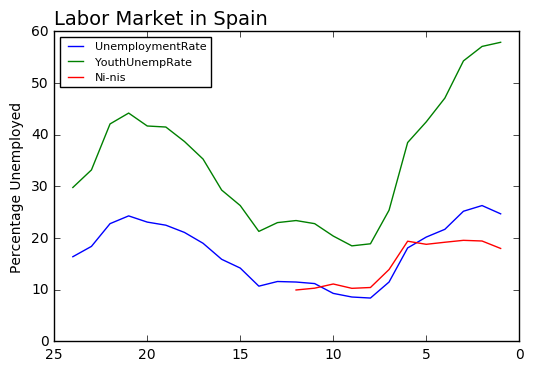

In [14]:
# with a clean and orthodox Dataframe, I can start to do some graphics
import matplotlib.pyplot as plt
%matplotlib inline
# we invert the x axis. Never managed to make 'Year' the X axis, lost a lot of hair in the process :(
plt.gca().invert_xaxis() # Came up with this solution
# and add the indicators 
plt.plot(esplbr.index, esplbr['UnemploymentRate'])
plt.plot(esplbr.index, esplbr['YouthUnempRate'])
plt.plot(esplbr.index, esplbr['Ni-nis'])
# and modify the plot
plt.title('Labor Market in Spain', fontsize=14, loc='left') # add title
plt.ylabel('Percentage Unemployed') # y axis label 
plt.legend(['UnemploymentRate', 'YouthUnempRate','Ni-nis'], fontsize=8, loc=0) 

**Observations**

* Spain has recently lived through a depression without precedent, yet unemployment rates above 20% are nothing new: there is a large structural component in addition to the demand-deficient factor.

* Youth unemployment is particuarly bad, which is the norm elsewhere too, but the spread is accentuated in Spain. Deductively, this hints at labor market duality between bullet-proof contracts and part-time or 'indefinite' contracts. 


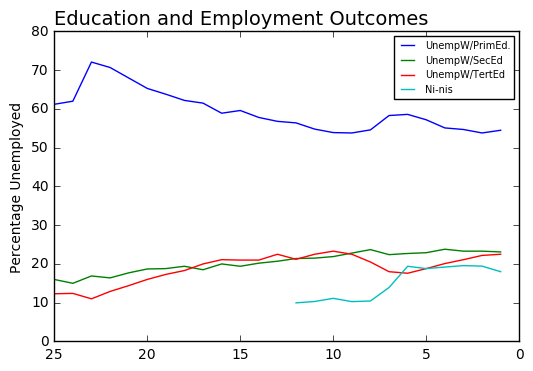

In [16]:
# let's take a look at unemployment by education level
import matplotlib.pyplot as plt
%matplotlib inline
# we invert the x axis
plt.gca().invert_xaxis()
#we add the variables 
plt.plot(esplbr.index, esplbr['UnempW/PrimEd.'])
plt.plot(esplbr.index, esplbr['UnempW/SecEd'])
plt.plot(esplbr.index, esplbr['UnempW/TertEd'])
plt.plot(esplbr.index, esplbr['Ni-nis'])
# we modify the plot
plt.title('Education and Employment Outcomes', fontsize=14, loc='left')
plt.ylabel('Percentage Unemployed')          
plt.legend(['UnempW/PrimEd.', 'UnempW/SecEd','UnempW/TertEd', 'Ni-nis'], fontsize=7, loc=0) 

**Observations**

* Those unemployed with only primary education completed and ni-nis start to rise hand in hand ten years ago, when the crisis hits. This suggests overlap between the two groups.
* The elephant in the room a massive construction bubble that made Spain's variant of the crisis particularly brutal. For decades, a debt-fueled bubble in real estate signaled youngsters to drop the books and pick up the bricks.
* The labor market now faces the painful readjustment of the economy's productive model, from "deuda y ladrillo" (debt and brick) to exports, that account for Spain's recent growth

P.S.: if you ever need to investigate (how not to execute) a Keynesian stimulus plan, check out how the government's *Plan E* added fuel to malinvestments http://www.economist.com/node/13611650 




## Digging for more

I'm interested in measuring structural unemployment. Ideally, I would build an unemployment model myself based on separation and accesion rates to arrive at the Natural Rate of Unemployment, as we see in one of my three bibles:

http://www.stern.nyu.edu/sites/default/files/assets/documents/The_Global_Economy_Amazon_Digital%20%282%29.pdf

In the interest of time, I sought an indicator that acts as a proxy for structural unemployment. The NAIRU and NAWRU come to mind, but they are not reported by the World Bank. 

And so I became acquainted with Quandl's API and proceeded to dig through several economic databases, and landed at the notorious OECD database: I suspect Quandl and I  are going to become good friends moving forward. 

## Load the modules

In [17]:
# Don't forget the the DMV paperwork
import quandl # Quandl package
quandl.ApiConfig.api_key = '3w_GYBRfX3ZxG7my_vhs' # register for a key and unlimited number of requests 
# Playing it safe
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np
%matplotlib inline    


## Data extraction and clean up 

We're going to be comparing Spain's NAIRU to that of Denmark. Don't tell Sanders, but Denmark is well known for having one of the most 'flexible' labor markets in Europe.

In [18]:
# We extract the indicators and print the dataframe
NAIRU = quandl.get((['OECD/EO91_INTERNET_ESP_NAIRU_A','OECD/EO91_INTERNET_DNK_NAIRU_A']), #We call for both
                   start_date = "1990-12-31", end_date = "2013-12-31") # And limit the time horizon 
NAIRU

,OECD/EO91_INTERNET_ESP_NAIRU_A - Value,OECD/EO91_INTERNET_DNK_NAIRU_A - Value
Date,,
1990-12-31,14.353311,6.724285
1991-12-31,14.571544,6.860554
1992-12-31,14.953883,6.932394
1993-12-31,15.478153,6.912441
1994-12-31,15.824915,6.700012
1995-12-31,15.807487,6.448332
1996-12-31,15.465041,6.182695
1997-12-31,15.006013,5.900041
1998-12-31,14.366738,5.663739


In [19]:
# What do we have here?
type(NAIRU)

pandas.core.frame.DataFrame

In [20]:
NAIRU.columns 

Index(['OECD/EO91_INTERNET_ESP_NAIRU_A - Value', 'OECD/EO91_INTERNET_DNK_NAIRU_A - Value'], dtype='object')

In [21]:
# Dataframe housekeeping 
NAIRU.columns = ['NAIRU Spain', 'NAIRU Denmark']
NAIRU

,NAIRU Spain,NAIRU Denmark
Date,,
1990-12-31,14.353311,6.724285
1991-12-31,14.571544,6.860554
1992-12-31,14.953883,6.932394
1993-12-31,15.478153,6.912441
1994-12-31,15.824915,6.700012
1995-12-31,15.807487,6.448332
1996-12-31,15.465041,6.182695
1997-12-31,15.006013,5.900041
1998-12-31,14.366738,5.663739


In [22]:
# Nice and polished
NAIRU.columns

Index(['NAIRU Spain', 'NAIRU Denmark'], dtype='object')

In [23]:
plt.style.available #Take a look at the menu

['seaborn-colorblind',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-muted',
 'grayscale',
 'bmh',
 'seaborn-dark',
 'seaborn-poster',
 'seaborn-darkgrid',
 'classic',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'seaborn-ticks',
 'ggplot',
 'dark_background',
 'seaborn-deep',
 'seaborn-paper',
 'seaborn-talk',
 'seaborn-notebook']

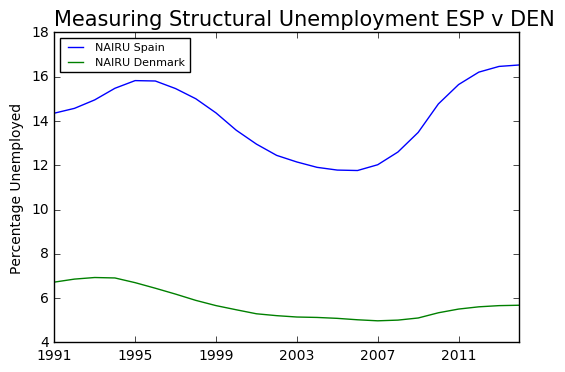

In [24]:
# We are ready to plot
import matplotlib.pyplot as plt
%matplotlib inline
#we add the variables 
plt.plot(NAIRU.index, NAIRU['NAIRU Spain'])
plt.plot(NAIRU.index, NAIRU['NAIRU Denmark'])
#We modify the plot
plt.title('Measuring Structural Unemployment ESP v DEN', fontsize=15, loc='left') # add title
plt.ylabel('Percentage Unemployed') # y axis label 
plt.legend(['NAIRU Spain', 'NAIRU Denmark'], fontsize=8, loc=2) # more descriptive variable namesDescribe what each of these arguments/parameters does
plt.style.use("bmh")

**Observations**

* Although the NAIRU is not a perfect proxy for structural unemployment, it's a good place to start
* Again, we witness how Spain's unemployment problem is almost ingrained in its 'production function'


*****

This project has left me at the doors of great questions,

that this course has given me the tools to answer,

and for that I thank you,

Bosco Rodríguez Ballvé